# CS180 Project: Filipino Student Employability Predictor

##### This is a course requirement submitted by Group # 14 for CS180 Artificial Intelligence Course of the Department of Computer Science, College of Engineering, University of the Philippines, Diliman under the guidance of Sir Carlo Raquel for AY 2022-2023.

##### The dataset entitled 'Students' Employability Dataset - Philippines' can be found <a href="https://www.kaggle.com/datasets/anashamoutni/students-employability-dataset" target="_blank">here</a>.

# Part 1: Importing the Dataset


##### We will be using the Student-Employability-Datasets.xlsx dataset, which classifies whether a student is **Employable** or **LessEmployable**, given a set of criteria.

In [1]:
#Import dataset and libraries here
import pandas as pd
import numpy as np

data = pd.read_excel('../data/Student-Employability-Datasets.xlsx')

#Remove the 'Name of Student' column, for it is not needed
data = data.drop("Name of Student", axis=1)

data

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,Employable
1,4,4,4,4,4,4,3,5,Employable
2,4,3,3,3,3,3,2,5,LessEmployable
3,3,3,3,2,3,3,3,5,LessEmployable
4,4,4,3,3,4,4,3,5,Employable
...,...,...,...,...,...,...,...,...,...
2977,4,3,3,3,3,3,2,5,Employable
2978,3,4,4,4,4,4,4,5,Employable
2979,4,5,4,5,4,4,4,5,Employable
2980,4,4,4,3,4,4,3,5,LessEmployable


# Part 2: Data Preprocessing

##### The classifier requires a training set and a test set. For each set, the column containing the student employability label must be separated from the criteria data, so that the label will not be affect by the normalization. We will be separating the dataset into a features matrix and a target matrix.



In [2]:
#Features matrix - the 8 criteria of student employability
x = data.drop('CLASS', axis = 1)
x

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
0,4,5,4,5,5,5,5,5
1,4,4,4,4,4,4,3,5
2,4,3,3,3,3,3,2,5
3,3,3,3,2,3,3,3,5
4,4,4,3,3,4,4,3,5
...,...,...,...,...,...,...,...,...
2977,4,3,3,3,3,3,2,5
2978,3,4,4,4,4,4,4,5
2979,4,5,4,5,4,4,4,5
2980,4,4,4,3,4,4,3,5


In [3]:
#Target matrix - The student employability label
y = data['CLASS']
y

0           Employable
1           Employable
2       LessEmployable
3       LessEmployable
4           Employable
             ...      
2977        Employable
2978        Employable
2979        Employable
2980    LessEmployable
2981        Employable
Name: CLASS, Length: 2982, dtype: object

# Part 3: Splitting the Data in Training and Testing Sets

##### Now that the data preprocessing is done, it is time to proceed with the splitting of the data into training and testing sets. We would be utilizing 70% of the data as training sets, and 30% of the data as testing sets.



In [4]:
from sklearn.model_selection import train_test_split

#Set a seed for data reproducibility
np.random.seed(321)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)
x_train

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
122,5,5,5,5,5,5,3,5
2900,4,4,4,3,3,3,3,3
2085,5,4,4,4,4,4,4,4
1986,5,5,4,5,4,4,5,4
843,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...
1425,5,5,5,4,5,4,5,5
1833,5,4,5,4,4,4,4,5
2847,4,3,4,4,4,3,3,5
124,4,3,4,4,4,3,3,5


# Part 4: Data Normalization for MLP

##### Before the actual learning process begins, the data should be normalized first, for the multilayer perceptron to work optimally.



In [5]:
#Normalize train and test sets for MLP
from sklearn.preprocessing import MinMaxScaler

#TANH activation
scaler = MinMaxScaler(feature_range=(-1,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
        -0.33333333,  1.        ],
       [ 0.33333333,  0.33333333,  0.33333333, ..., -0.33333333,
        -0.33333333, -1.        ],
       [ 1.        ,  0.33333333,  0.33333333, ...,  0.33333333,
         0.33333333,  0.        ],
       ...,
       [ 0.33333333, -0.33333333,  0.33333333, ..., -0.33333333,
        -0.33333333,  1.        ],
       [ 0.33333333, -0.33333333,  0.33333333, ..., -0.33333333,
        -0.33333333,  1.        ],
       [ 1.        ,  0.33333333,  1.        , ...,  0.33333333,
         0.33333333,  0.        ]])

# Part 5: MLP Training and Testing




In [6]:
#Fit and hyperparametrize model here
from sklearn.neural_network import MLPClassifier

#Set a seed for data reproducibility
np.random.seed(123)

mlp = MLPClassifier(activation='tanh')
mlp.fit(x_train,y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh')

##### We can improve the model by utilizing hyperparameter tuning with GridSearchCV. We initially used a list of values for the hyperparameters, and took note of the best values for each one, in order to avoid iterating all over again. This is to save time.

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [8], 'max_iter': [20000], 'learning_rate_init': [0.01],'alpha':[0.001], 'activation': ['tanh']} 
grid = GridSearchCV(mlp,param_grid,refit=True)
grid.fit(x_train,y_train)

GridSearchCV(estimator=MLPClassifier(activation='tanh'),
             param_grid={'activation': ['tanh'], 'alpha': [0.001],
                         'hidden_layer_sizes': [8],
                         'learning_rate_init': [0.01], 'max_iter': [20000]})

# Part 6: Results and Discussion

##### After the hyperparametrization, we can now predict our model and gauge its accuracy.



In [8]:
from sklearn.metrics import accuracy_score

grid_predictions = grid.predict(x_test)
print(accuracy_score(y_test, grid_predictions))

0.9050279329608939


##### With this model, we have achieved ~90% accuracy in classifying student employability. We can display the confusion matrix for further analysis.

Text(113.9222222222222, 0.5, 'true value')

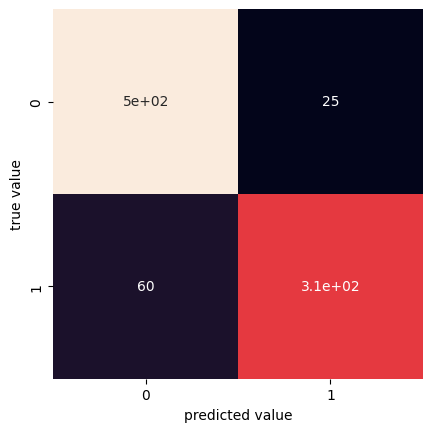

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, grid_predictions)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [10]:
# Save model here and test if it still works

import pickle

saved_model = 'best_MLP_model_for_now.sav'
pickle.dump(grid, open(saved_model, 'wb'))

# Test if model works and predict again
loaded_model = pickle.load(open(saved_model, 'rb'))
print(loaded_model.best_params_)
predict_again = loaded_model.predict(x_test)
# print(predict_again)
# print(y_test)
print(accuracy_score(y_test, predict_again))

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 8, 'learning_rate_init': 0.01, 'max_iter': 20000}
0.9050279329608939
